##### Extract the binding energy for the ferromagnetic Kitaev model

In [24]:
import os
import h5py
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import (inset_axes, InsetPosition, mark_inset)
from matplotlib import cm

In [26]:
from scipy.optimize import curve_fit
from scipy.interpolate import splrep, BSpline, InterpolatedUnivariateSpline

In [28]:
print("Current working directory:", os.getcwd())

Current working directory: /Users/boxiao/Research/Tensor_Networks/Non_Abelian_Anyons


In [30]:
goldenRatio = (5**0.5 - 1) / 2.0

In [32]:
def data_extrapolation(file_name, label):
    '''
        A simple function to extrapolate data from HDF5 file
    '''
    if not os.path.exists(file_name):
        raise FileNotFoundError(f"Error: The file '{file_name}' does not exist!")
    
    tmp_file = h5py.File(file_name, "r")
    # print(tmp_file.keys())
    if label not in tmp_file.keys():
        raise KeyError(f"Error: The key '{label}' doesn't exist in the file!")
    tmp_Sz = np.array(tmp_file[label]).transpose()
    
    return tmp_Sz

In [34]:
# def obtain_colors(number_of_lines, palette):
#     '''
#         Truncate colors from continuous color palette
#     '''
    
#     color_interval = np.linspace(0, 1, number_of_lines)
#     colors = [palette(x) for x in color_interval]
#     return colors

In [118]:
file_path = "data/test/armchair_geometery/2d_kitaev_honeycomb_armchair_Nx6_h0.0.h5"
E0_Lx6 = data_extrapolation(file_path, "E0")
E0_Lx6

array(-9.18336406)

In [120]:
Loop_Lx6 = data_extrapolation(file_path, "Loop")
Plaquette_Lx6 = data_extrapolation(file_path, "Plaquette")
Loop_Lx6

array([ 1.,  1., -1.,  1.,  1.,  1.])

In [122]:
file_path = "data/test/armchair_geometery/2d_kitaev_honeycomb_armchair_Nx4_h0.0.h5"
E0_Lx4 = data_extrapolation(file_path, "E0")
E0_Lx4

array(-6.08062163)

In [124]:
Loop_Lx4 = data_extrapolation(file_path, "Loop")
Plaquette_Lx4 = data_extrapolation(file_path, "Plaquette")
Plaquette_Lx4

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

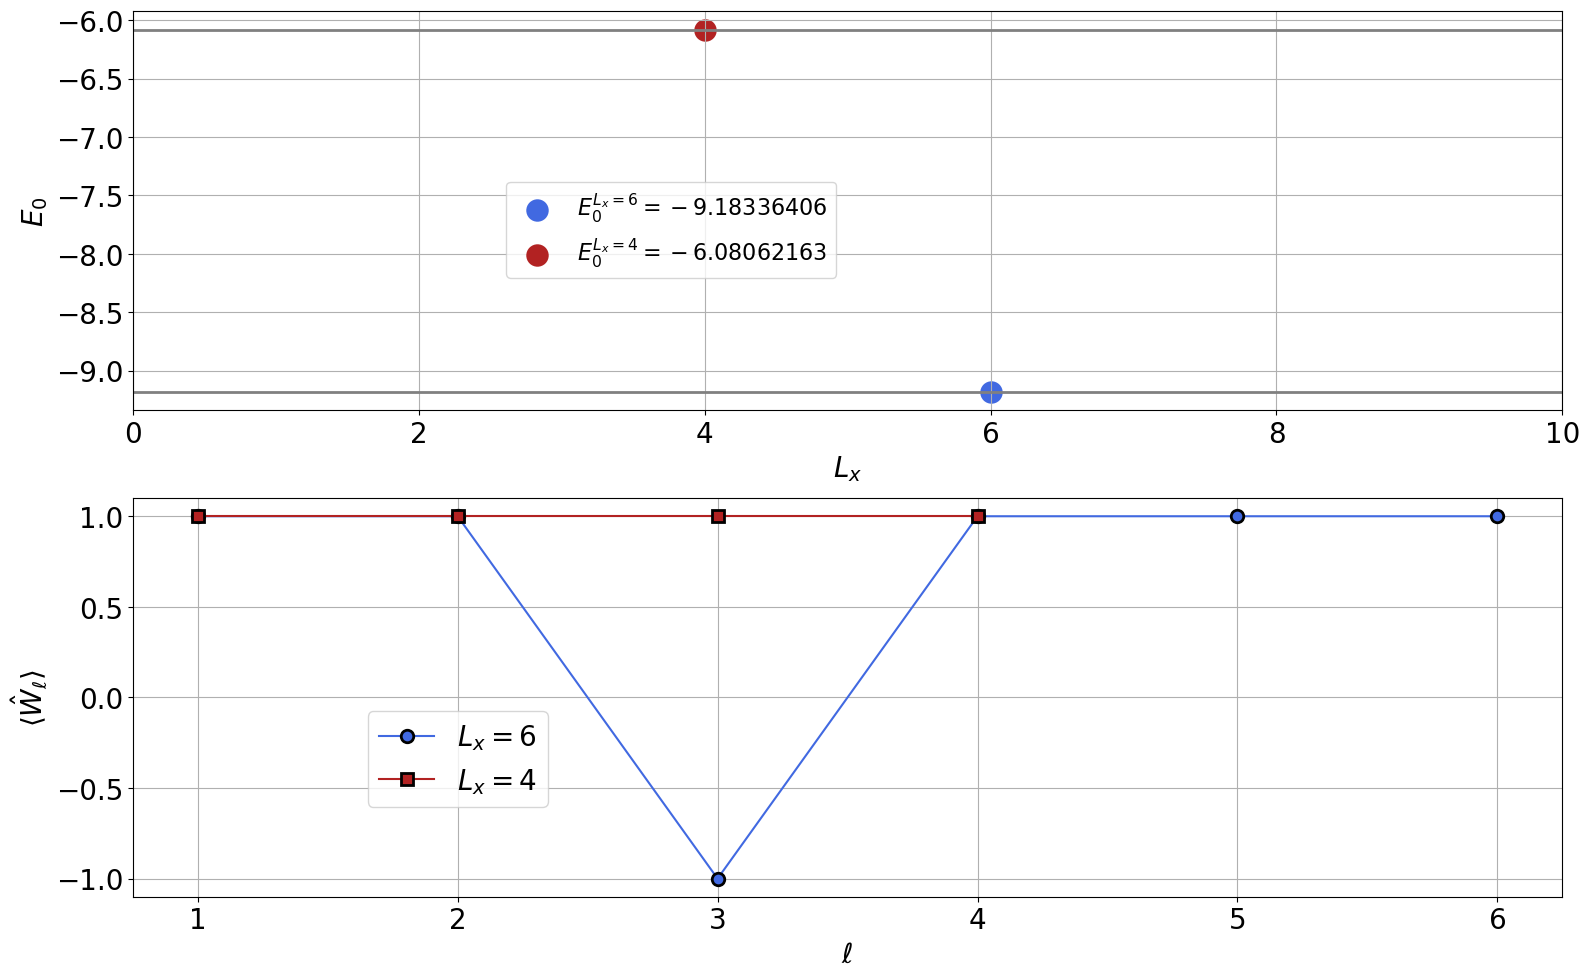

In [156]:
'''
   Analyze the field strength dependence of the Kitaev honeycomb lattice
'''

fig = plt.figure(figsize = (16, 16 * goldenRatio), tight_layout = True)
spec = gridspec.GridSpec(nrows = 2, ncols = 1, figure = fig)

ax = fig.add_subplot(spec[0, 0])   
ax.axhline(y = E0_Lx6, xmin = 0, xmax = 10, linewidth = 2, color = "gray")
ax.scatter(6, E0_Lx6, linewidth = 2, s = 200, color = "royalblue", label = r"$E_{0}^{L_{x}=6} = -9.18336406$")

ax.axhline(y = E0_Lx4, xmin = 0, xmax = 10, linewidth = 2, color = "gray")
ax.scatter(4, E0_Lx4, linewidth = 2, s = 200, color = "firebrick", label = r"$E_{0}^{L_{x}=4} = -6.08062163$")

ax.set_xlim(0, 10)    
ax.set_xlabel(r"$L_{x}$", fontsize = 20)
ax.set_ylabel(r'$E_{0}$', fontsize = 20)  
ax.tick_params(axis = 'both', which = 'major', labelsize = 20) 
ax.legend(frameon = True, fontsize = 16, ncol = 1, bbox_to_anchor = [0.5, 0.6])
ax.grid()  


ax = fig.add_subplot(spec[1, 0])
ax.plot(np.arange(1, 7, 1), Loop_Lx6, color = "royalblue", marker = "o", markeredgewidth = 2, \
        markersize = 9, markeredgecolor = "black", label = r"$L_{x} = 6$")
ax.plot(np.arange(1, 5, 1), Loop_Lx4, color = "firebrick", marker = "s", markeredgewidth = 2, \
        markersize = 9, markeredgecolor = "black", label = r"$L_{x} = 4$")

ax.set_xlabel(r"$\ell$", fontsize = 20)
ax.set_ylabel(r'$\langle \hat{W}_{\ell} \rangle$', fontsize = 20)  
ax.tick_params(axis = 'both', which = 'major', labelsize = 20) 
ax.legend(frameon = True, fontsize = 20, ncol = 1, bbox_to_anchor = [0.3, 0.5])
ax.grid()  

plt.savefig("notes/figures/tests/armchair_geometery/kitaev_armchair_FM_h0_E0_loop.pdf")

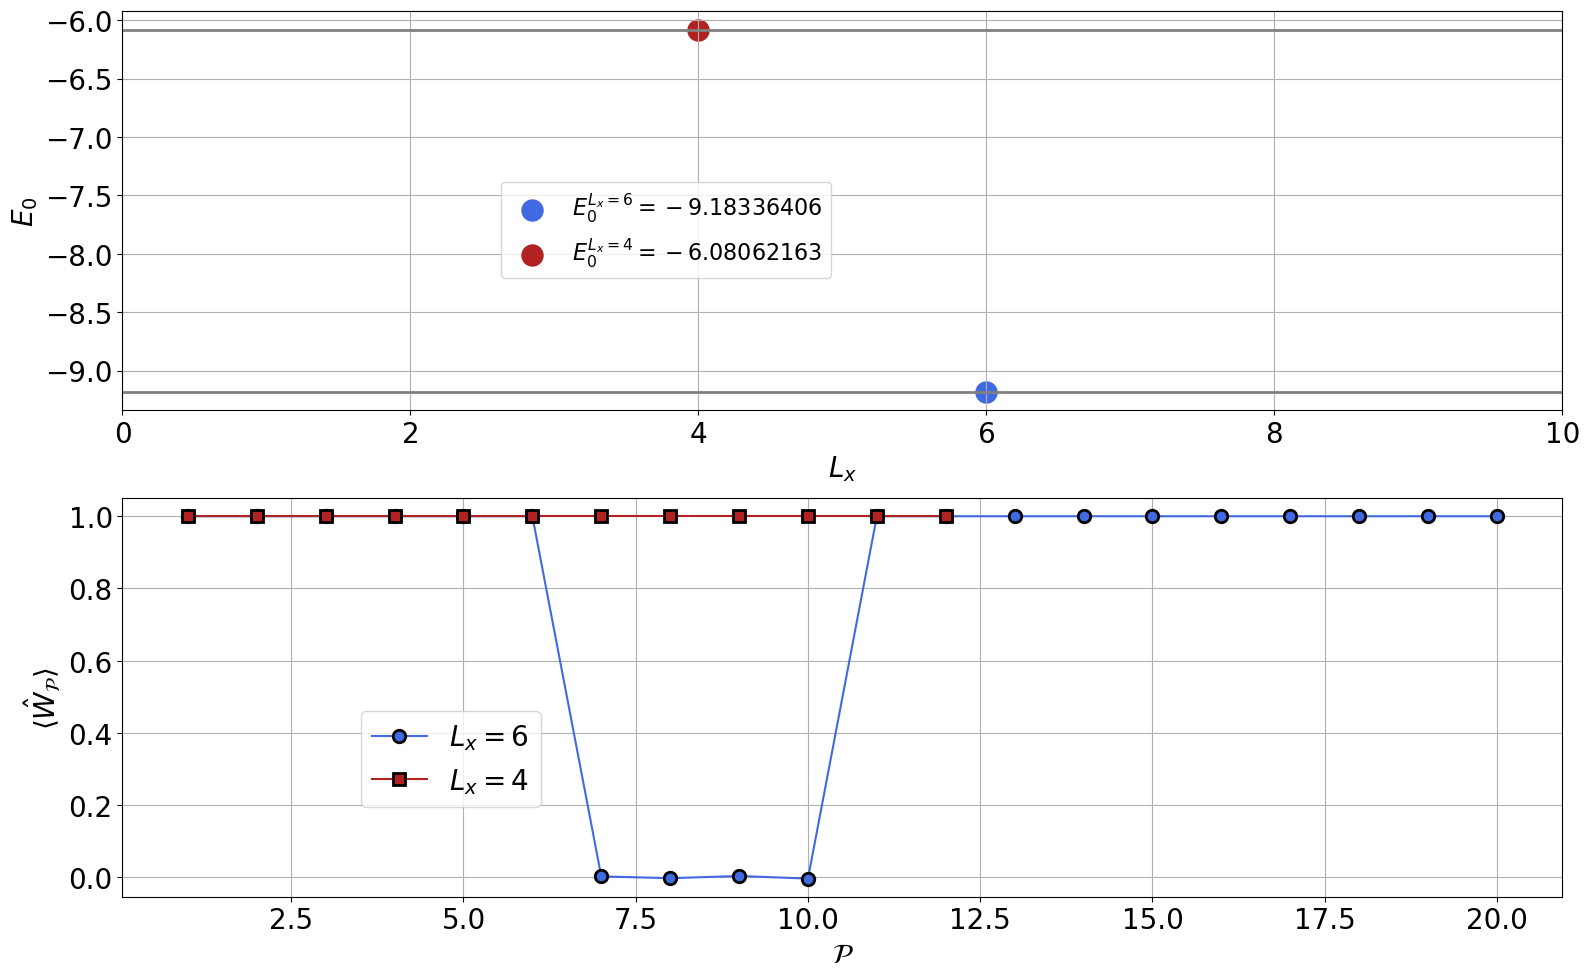

In [158]:
'''
   Analyze the field strength dependence of the Kitaev honeycomb lattice
'''

fig = plt.figure(figsize = (16, 16 * goldenRatio), tight_layout = True)
spec = gridspec.GridSpec(nrows = 2, ncols = 1, figure = fig)

ax = fig.add_subplot(spec[0, 0])   
ax.axhline(y = E0_Lx6, xmin = 0, xmax = 10, linewidth = 2, color = "gray")
ax.scatter(6, E0_Lx6, linewidth = 2, s = 200, color = "royalblue", label = r"$E_{0}^{L_{x}=6} = -9.18336406$")

ax.axhline(y = E0_Lx4, xmin = 0, xmax = 10, linewidth = 2, color = "gray")
ax.scatter(4, E0_Lx4, linewidth = 2, s = 200, color = "firebrick", label = r"$E_{0}^{L_{x}=4} = -6.08062163$")

ax.set_xlim(0, 10)    
ax.set_xlabel(r"$L_{x}$", fontsize = 20)
ax.set_ylabel(r'$E_{0}$', fontsize = 20)  
ax.tick_params(axis = 'both', which = 'major', labelsize = 20) 
ax.legend(frameon = True, fontsize = 16, ncol = 1, bbox_to_anchor = [0.5, 0.6])
ax.grid()  


ax = fig.add_subplot(spec[1, 0])
ax.plot(np.arange(1, Plaquette_Lx6.shape[0] + 1, 1), Plaquette_Lx6, color = "royalblue", marker = "o", markeredgewidth = 2, \
        markersize = 9, markeredgecolor = "black", label = r"$L_{x} = 6$")
ax.plot(np.arange(1, Plaquette_Lx4.shape[0] + 1, 1), Plaquette_Lx4, color = "firebrick", marker = "s", markeredgewidth = 2, \
        markersize = 9, markeredgecolor = "black", label = r"$L_{x} = 4$")

ax.set_xlabel(r"$\mathcal{P}$", fontsize = 20)
ax.set_ylabel(r'$\langle \hat{W}_{\mathcal{P}} \rangle$', fontsize = 20)  
ax.tick_params(axis = 'both', which = 'major', labelsize = 20) 
ax.legend(frameon = True, fontsize = 20, ncol = 1, bbox_to_anchor = [0.3, 0.5])
ax.grid()  

plt.savefig("notes/figures/tests/armchair_geometery/kitaev_armchair_FM_h0_E0_plaquette.pdf")